# Purpose:

This collab file is focused on taking Chinese texts in .txt format, translating them, and creating a word cloud. To find the link for web scraping Chinese articles, follow this link:

First, install google translate

In [ ]:
!pip install googletrans==4.0.0-rc1

Simple sanity test case to check whether Google Translate is working:

In [ ]:
from googletrans import Translator
def sanity_check(chinese_text):
  translator = Translator()
  translated = translator.translate(chinese_text, src='zh-cn', dest='en')
  print("Initial text: " + chinese_text)
  print("Translated text: " + translated.text)

# It should print "Hello, my name is Wang Zhongyi."
sanity_check("你好，我叫王中一。")

Initial text: 你好，我叫王中一。
Translated text: Hello, my name is Wang Zhongyi.


The following method takes in a txt file (given its name) and translates the text inside from Chinese to English. Depending on what you want the method to do, it will store the translated text in a variable or export it into another txt file with the specified name you give it. You will need to manually change the code though.



Note: this code was made in Google Collab and will likely need to change if you want it to work on Github.

In [ ]:
from googletrans import Translator
import time

def translate_chinese_file(file_path, output_file_path = "", retries=3):
    translator = Translator()

    # Open and read the content of the input file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Prepare a list to hold translated lines
    translated_lines = []
    for line in lines:
        if line.strip():  # Check if the line is not empty
            # Attempt translation for non-empty lines
            for attempt in range(retries):
                try:
                    translated = translator.translate(line.strip(), src='zh-cn', dest='en')
                    translated_lines.append(translated.text + '\n')  # Append the translated line with a newline
                    break  # Break if translation is successful
                except Exception as e:
                    print(f"Retrying translation due to an error: {e}")
                    time.sleep(2)  # Wait before retrying
            else:
                translated_lines.append(line)  # If all retries fail, keep the original line
        else:
            # Append empty lines directly to maintain the format
            translated_lines.append('\n')

    # Join all translated lines to maintain original structure
    translated_text = ''.join(translated_lines)

    # For the code below, uncomment the option you want

    # Simply returns the code
    return translated_text

    # Save the translated text to the specified output file
    # assert output_file_path != ""
    # with open(output_file_path, 'w', encoding='utf-8') as output_file:
    #     output_file.write(translated_text)

    # print(f"Translation saved to {output_file_path}")


Translates all the Harris and Trump article texts and stores it in their respective variables

In [ ]:
# Test run
harris_texts = translate_chinese_file('china_harris_texts.txt', 'china_translated_harris_text.txt')

In [ ]:
trump_texts = translate_chinese_file('china_trump_texts.txt', 'china_translated_trump_text.txt')

installing word cloud library

In [ ]:
!pip install wordcloud matplotlib

Creating stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("english"))
    stop_words.add("say")
    stop_words.add("s")
    stop_words.add("S")
    stop_words.add("u.s")
    stop_words.add("said")
    print("said" in stop_words)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preparing the data for wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_comb_text = ""
for i in trump_texts:
  trump_comb_text += i

trump_comb_text = remove_stopwords(trump_comb_text)

harris_comb_text = ""
for i in harris_texts:
  harris_comb_text += i

harris_comb_text = remove_stopwords(harris_comb_text)


True
True


In [ ]:
harris_word_list = harris_comb_text.split(" ")
print("s" in harris_word_list)

False


Creating the wordcloud:

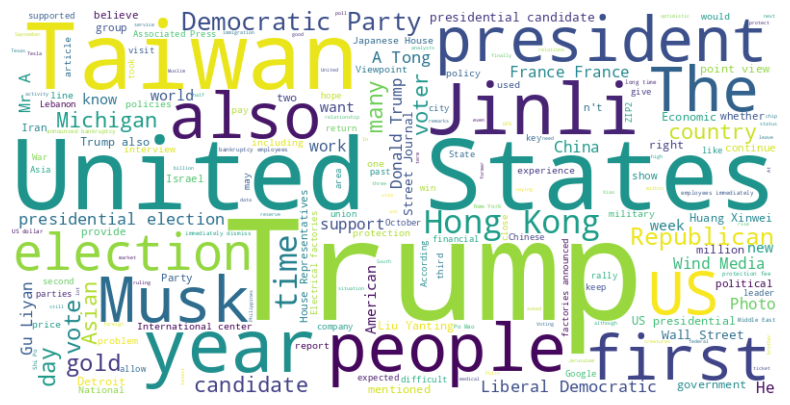

--------------------------------------------------


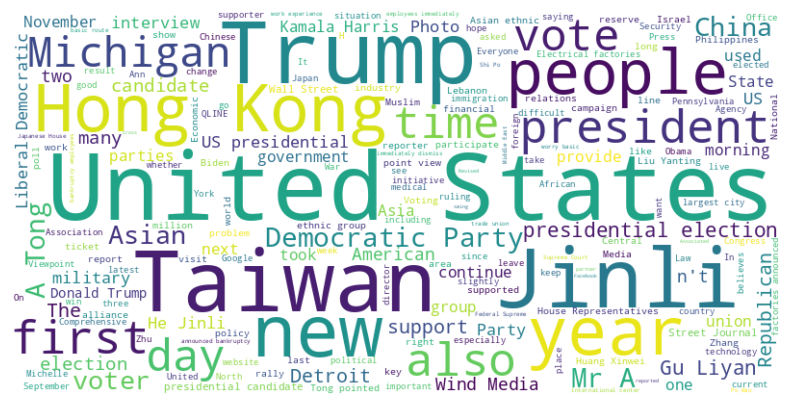

--------------------------------------------------
Word: Trump, Frequency: 1.0
Word: United States, Frequency: 0.9038461538461539
Word: Taiwan, Frequency: 0.8076923076923077
Word: year, Frequency: 0.46153846153846156
Word: Jinli, Frequency: 0.4423076923076923
Word: people, Frequency: 0.38461538461538464
Word: Musk, Frequency: 0.34615384615384615
Word: also, Frequency: 0.34615384615384615
Word: president, Frequency: 0.3269230769230769
Word: first, Frequency: 0.3269230769230769
Word: The, Frequency: 0.3269230769230769
Word: US, Frequency: 0.3076923076923077
Word: election, Frequency: 0.3076923076923077
Word: Hong Kong, Frequency: 0.3076923076923077
Word: time, Frequency: 0.28846153846153844
Word: Democratic Party, Frequency: 0.28846153846153844
Word: Republican, Frequency: 0.2692307692307692
Word: gold, Frequency: 0.25
Word: vote, Frequency: 0.25
Word: day, Frequency: 0.23076923076923078
Word: many, Frequency: 0.23076923076923078
Word: candidate, Frequency: 0.21153846153846154
Word: coun

In [ ]:
wordcloud_trump = WordCloud(width=800, height=400, stopwords=("s", "U"), background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, stopwords=("s", "U"), background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")
